## Dataset and DataLoader

Deep Neural Network are very data hungry. Before training Neural nets, we need to grab data, load it, preprocess it and then only we can feed them to our networks.

For this, we need a efficient way to manage the loading, preprocessing and feeding of data in computationally effective manner. This is when PyTorch framework comes into work.

Dataset class is the class consisting of all the data we need. They have methods that fetch the data in order to retrive when necessary.

DataLoader class has a Dataset class.

First, we have a large data. We load that data into Dataset Class. Dataset class is then fed to DataLoader which then uses the dataset class to retrive the data.

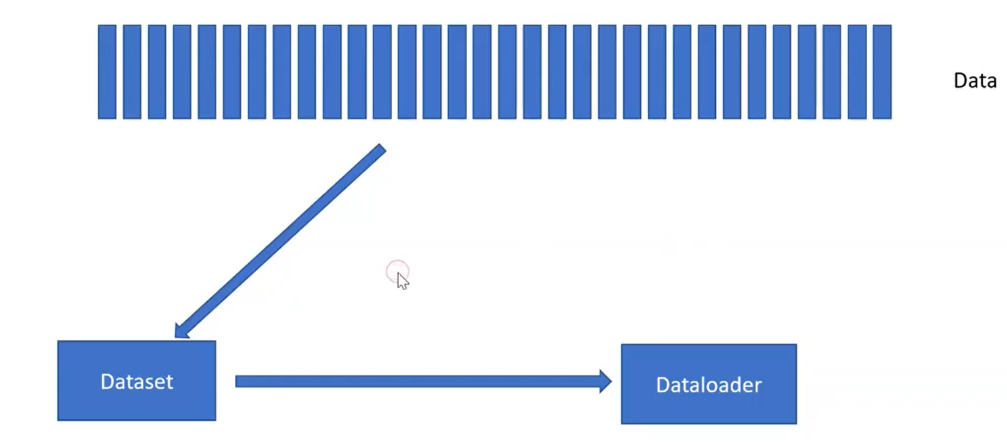

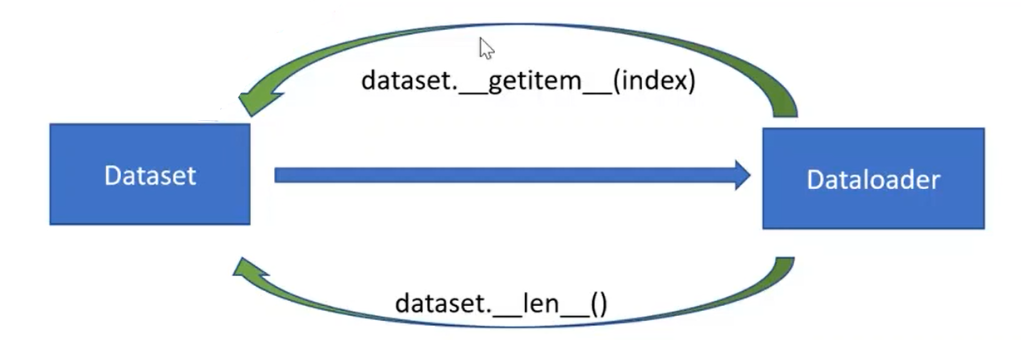

How DataLoader loads the data?<br>
Let's understand by the figure below:
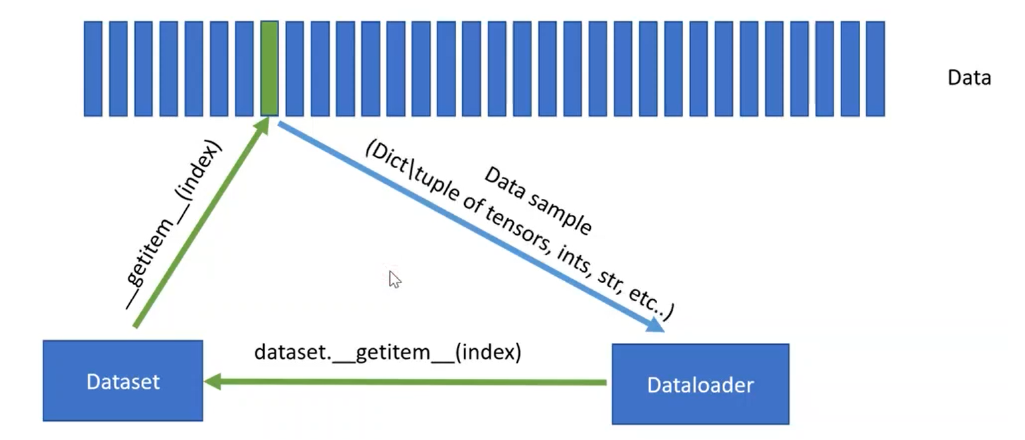

We have what we call ***Workers*** that retrive the data using the index in tuple/dictionary form. The retrived data is organized as a queue of tuples/dicts in individual manner.Since, we need to convert the data into batches in order to make the network computationally faster. For this, ***collate_fn()*** is used.

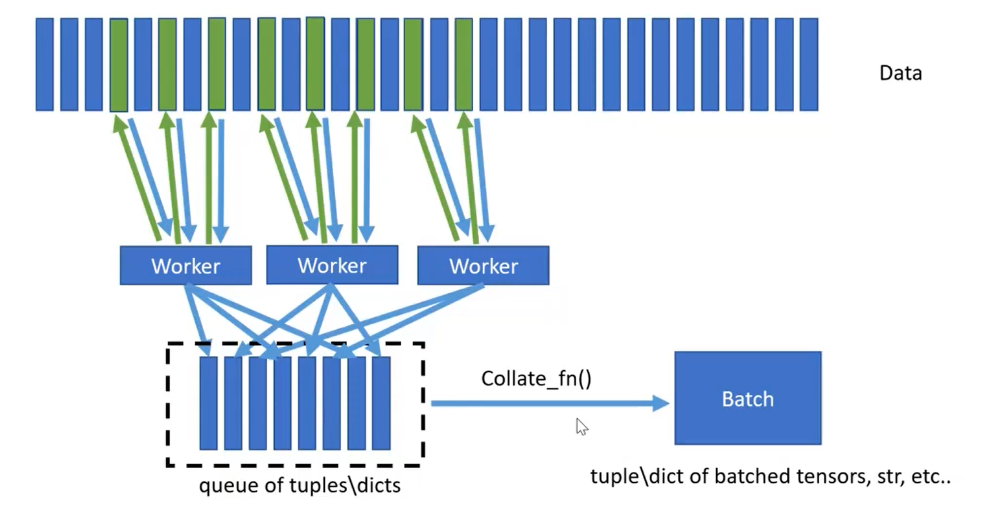

NOTE:<br>
    1. ***epoch*** - One forward and backward pass of all training data.<br>
    2. ***batch_size*** - number of training samples in one forward and backward pass.<br>
    3. ***number_of_iterations*** - Number of passes, each pass using [batch_size] number of samples.<br>
***Example*** : If 100 semples, batch size = 20 then, 100/20 = 5 iterations for 1 epoch 

In [1]:
#Importing necessary modules
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

Let's do an example:

First let's generate some data:

In [2]:
#Importing sklearn make_classification dataset
from sklearn.datasets import make_classification

#Load the data
data, targets = make_classification(n_samples = 1000)

In [3]:
data

array([[ 0.5441063 ,  0.47542522, -1.21414578, ..., -0.71004234,
        -0.88182441, -1.14999984],
       [ 4.35104752,  2.2945991 ,  0.02980198, ..., -0.38784685,
        -0.68849543, -3.63285998],
       [ 0.26286471, -1.3743196 , -1.02220889, ...,  0.6535727 ,
        -0.61599353,  0.30003496],
       ...,
       [-1.79559464,  1.54400127,  0.62423615, ..., -0.29704574,
         2.03336781,  1.98798151],
       [ 0.08230463,  0.56013952, -0.34510935, ..., -0.79979655,
         0.85507359, -0.44342147],
       [ 1.23270741, -1.09092573, -0.55503309, ...,  2.19152834,
        -0.40603368, -0.01255299]])

In [4]:
targets

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,

In [5]:
#Shape of features
data.shape

(1000, 20)

In [6]:
#Shape of targets
targets.shape

(1000,)

In [7]:
#Creating customDataset class
class customDataset():
    
    #Initialization
    def __init__(self, data, targets):
        #data loading
        self.data = data
        self.targets = targets

        
    #Get Item by index
    def __getitem__(self, index):
        current_sample = self.data[index, :]
        current_target = self.targets[index]
        return{
            "samples" : torch.tensor(current_sample, dtype = torch.float),
            "target" : torch.tensor(current_target, dtype = torch.float)
        }
    
    #Get length of data
    def __len__(self):
        return len(self.data) #returning the number of samples/length of data

In [8]:
#Creating object from class
custom_dataset = customDataset(data, targets)

In [9]:
custom_dataset

In [10]:
#Length of the dataset class object
len(custom_dataset)

1000

In [11]:
custom_dataset[0]

{'samples': tensor([ 0.5441,  0.4754, -1.2141,  2.2717,  1.4950, -0.0093, -0.3406,  0.0810,
          0.7279, -0.1039, -0.3346, -1.1416,  0.6229,  0.9740, -1.5527, -0.7856,
          0.6399, -0.7100, -0.8818, -1.1500]), 'target': tensor(0.)}

In [12]:
custom_dataset[0]['samples']

tensor([ 0.5441,  0.4754, -1.2141,  2.2717,  1.4950, -0.0093, -0.3406,  0.0810,
         0.7279, -0.1039, -0.3346, -1.1416,  0.6229,  0.9740, -1.5527, -0.7856,
         0.6399, -0.7100, -0.8818, -1.1500])

In [13]:
custom_dataset[0]['target']

tensor(0.)

We have created our dataset class and used it to load data.

Let's do another example.

In [14]:
import pandas as pd
wine = pd.read_csv('https://raw.githubusercontent.com/patrickloeber/pytorchTutorial/master/data/wine/wine.csv')

In [15]:
wine.head(5)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Here, we have our wine dataset loaded. The ***Wine*** feature in the data indicates the class of wine, our data consists of 3 different labels and we want to predict it (classification). Now, we will create a dataset class for it.

Now, we can start implementing our own custom dataset. Let's create a new class ***WineDataset*** that inherits ***Dataset*** class.

In [16]:
#Creating own custom WineDataset
class WineDataset():
    
    #Initialization
    def __init__(self, data):
        #data loading
        self.x = torch.from_numpy(data.iloc[:, 1:].values) #features as tensors
        self.y = torch.from_numpy(data.iloc[:, [0]].values) #category as tensors
        self.n_samples = data.shape[0] #number of samples
        
    #Get Item by index
    def __getitem__(self, index):
        return self.x[index], self.y[index] #returning x & y of respective index
    
    #Get length of data
    def __len__(self):
        return self.n_samples #returning the number of samples/length of data

In [17]:
#Create the dataset object
dataset = WineDataset(wine)

Now, we have our dataset. Let's check the first entry of our data.

In [18]:
first_data = dataset[0]

#Unpacking
first_feature, first_label = first_data

In [19]:
print("First Feature : ", first_feature)
print("First Label :",  first_label)

First Feature :  tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03], dtype=torch.float64)
First Label : tensor([1])


This is how we use dataset class. Now, let's talk about dataloader.

Syntax for dataloader:<br>
> DataLoader(dataset = dataset_name, batch_size = n, shuffle = True/False, num_workers= x)<br>
> ***DataLoader*** is the built-in function for dataloading.<br>
> ***dataset = dataset_name***, dataset_name is the is the nameof dataset object instantiated from dataset class.<br>

In [23]:
dataloader = DataLoader(dataset = dataset, batch_size = 4, shuffle=True, num_workers=1)

Our dataloader object is instantiated. Now, we can use it to instantiate an iterator.

In [24]:
train_features, train_labels = next(iter(dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([4, 13])
Labels batch shape: torch.Size([4, 1])


We got 4 for each because we defined our batch size to be equal to 4.

In [25]:
train_features

tensor([[1.3560e+01, 1.7300e+00, 2.4600e+00, 2.0500e+01, 1.1600e+02, 2.9600e+00,
         2.7800e+00, 2.0000e-01, 2.4500e+00, 6.2500e+00, 9.8000e-01, 3.0300e+00,
         1.1200e+03],
        [1.2930e+01, 3.8000e+00, 2.6500e+00, 1.8600e+01, 1.0200e+02, 2.4100e+00,
         2.4100e+00, 2.5000e-01, 1.9800e+00, 4.5000e+00, 1.0300e+00, 3.5200e+00,
         7.7000e+02],
        [1.2370e+01, 1.0700e+00, 2.1000e+00, 1.8500e+01, 8.8000e+01, 3.5200e+00,
         3.7500e+00, 2.4000e-01, 1.9500e+00, 4.5000e+00, 1.0400e+00, 2.7700e+00,
         6.6000e+02],
        [1.3580e+01, 2.5800e+00, 2.6900e+00, 2.4500e+01, 1.0500e+02, 1.5500e+00,
         8.4000e-01, 3.9000e-01, 1.5400e+00, 8.6600e+00, 7.4000e-01, 1.8000e+00,
         7.5000e+02]], dtype=torch.float64)

In [26]:
train_labels

tensor([[1],
        [1],
        [2],
        [3]])

We can iterate over whole dataloader. Now, let's do a dummy training loop.

In [28]:
#Training Loop
num_epochs = 2
total_samples = len(dataset)
n_iterations =  math.ceil(total_samples/4)

In [29]:
print(total_samples)
print(n_iterations)

178
45


In [32]:
for epoch in range(num_epochs):
  for i, (inputs, labels) in enumerate(dataloader):
    #forward backward, update
    if (i+1) % 5 == 0:
      print(f'epoch {epoch + 1}/{num_epochs}, step {i+1}/{n_iterations}, inputs {inputs.shape}')

epoch 1/2, step 5/45, inputs torch.Size([4, 13])
epoch 1/2, step 10/45, inputs torch.Size([4, 13])
epoch 1/2, step 15/45, inputs torch.Size([4, 13])
epoch 1/2, step 20/45, inputs torch.Size([4, 13])
epoch 1/2, step 25/45, inputs torch.Size([4, 13])
epoch 1/2, step 30/45, inputs torch.Size([4, 13])
epoch 1/2, step 35/45, inputs torch.Size([4, 13])
epoch 1/2, step 40/45, inputs torch.Size([4, 13])
epoch 1/2, step 45/45, inputs torch.Size([2, 13])
epoch 2/2, step 5/45, inputs torch.Size([4, 13])
epoch 2/2, step 10/45, inputs torch.Size([4, 13])
epoch 2/2, step 15/45, inputs torch.Size([4, 13])
epoch 2/2, step 20/45, inputs torch.Size([4, 13])
epoch 2/2, step 25/45, inputs torch.Size([4, 13])
epoch 2/2, step 30/45, inputs torch.Size([4, 13])
epoch 2/2, step 35/45, inputs torch.Size([4, 13])
epoch 2/2, step 40/45, inputs torch.Size([4, 13])
epoch 2/2, step 45/45, inputs torch.Size([2, 13])
